In [6]:
%load_ext autoreload

In [7]:
%autoreload 2

In [14]:
from utilities import nodo2tree
import shuntingyard as sy
import importlib
from IPython.display import Math as show_latex

In [15]:
from semplificatore import Semplificatore as smp

In [39]:
test_expr = "1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2 + 1) + 2]#"
test_pow = "2^(3+4^5:2^7)#"
test_frac_1 = "(2+4)/(3+4)#"
test_riassuntivo = "3 + 13 * -(1+3) / (2^(1+4) - 6)#"
test_parentesi_semplice = "3/(4+2) + 2 * {3:(4+5) + 2^(6*1/2)}-(2*[5*(3+4)+5]-1)/6#"
test_parentesi_libere = "3/(4+2) + 2 * (3:(4+5) + 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_parentesi_libere2 = "3/(4+2) + 2 * (3:(4+5) : 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_rapido = "3 + 3 + 8 + 6 * 2#"
test_segni_unari_multipli = "---3 + -56 * -(-(-(5)))#"
test_lungo = "-19 + 4 * 45 / {12^[3+60/6:5] - 7/4 + 3 * (13 - 5 * -2^3)} * 22 / 143 - [13^2/45*3+3/(7+3^2)] : 3 - 1 + {12^(3+4)/12 + [5 - 3*4 + -(4^(9/3))]}#"
test_frac_exp = "(4/9)^(1/2)"
casi_potenze = ["-2^(-2)", "(1/2)^3", "3^(2*1/2)", "2^[8/4]"]

In [42]:
n = sy.parse_expr(casi_potenze[0], 'Q')
simpler = smp(n)
# nodo2tree(n)

In [43]:
texts = simpler.solve()
text = '\\\\&'.join(texts)
text = "\\begin{align}" + text + "\end{align}"
show_latex(text)

<IPython.core.display.Math object>

In [8]:
def string2latex(s):
    n = sy.parse_expr(s, 'Q')
    simpler = smp(n)
    texts = simpler.solve()
    text = '\\\\&'.join(texts)
    text = "\\begin{align}" + text + "\end{align}"
    return text

In [9]:
casi_semplici = ["(2+4)/(3+4)#", "2/3/4#", "5/(6/7)#", "(2*3+4)/5#", "2/(3+4/5)#", "(((2+3)/4)/(5+6))/7#"]
potenze = ["-2^(-2)", "(1/2)^3"]

In [10]:
lista_di_latex = []
for t in potenze:
    lista_di_latex.append(string2latex(t))
    print(t, "ok")

-2^(-2) ok
(1/2)^3 ok


In [11]:
show_latex(lista_di_latex[1])

<IPython.core.display.Math object>

In [8]:
import simplicio

In [72]:
casi_N_ok = ["15 * 3 + 2 : 2", "15 - 4 - (3*3)", "1 * 4 - 8 + 5 - 2 + 3", "2^3", "4 / (2 * 2)"]
casi_N_non_ok = ["-2", "4 - 8", "2^(-1)", "2^(1-2)", "3/4", "3 : 4"]

In [74]:
txts = []
for c in casi_N_ok:
    txts.append(simplicio.string2latex(c, 'N'))
    print(c, "ok")

15 * 3 + 2 : 2 ok
15 - 4 - (3*3) ok
1 * 4 - 8 + 5 - 2 + 3 ok
2^3 ok
4 / (2 * 2) ok


In [75]:
show_latex(simplicio.string2latex(casi_N_non_ok[4], 'N'))

DomainException: Numeri frazionari non ammessi in N!

In [67]:
show_latex(txts[5])

IndexError: list index out of range

In [40]:
n, d = sy.parse_expr(casi_N_ok[2], 'N')
simpler = smp(n)
nodo2tree(n)

TypeError: cannot unpack non-iterable NodoAddizione object

In [27]:
d

[({'type': 'Moltiplicazione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 1}), ({'type': 'Numero', 'id': -1, 'value': 4})),
 ({'type': 'Addizione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 2}), ({'type': 'Numero', 'id': -1, 'value': 3})),
 ({'type': 'Sottrazione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 5}), ({'type': 'Addizione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 2}), ({'type': 'Numero', 'id': -1, 'value': 3}))),
 ({'type': 'Addizione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 8}), ({'type': 'Sottrazione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 5}), ({'type': 'Addizione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 2}), ({'type': 'Numero', 'id': -1, 'value': 3})))),
 ({'type': 'Sottrazione', 'id': -1}: ({'type': 'Moltiplicazione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 1}), ({'type': 'Numero', 'id': -1, 'value': 4})), ({'type': 'Addizione', 'id': -1}: ({'type': 'Numero', 'id': -1, 'value': 8}), ({'type': 'So

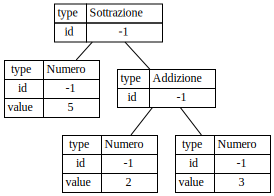

In [36]:
d[2]